___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [6]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [8]:
# Checking the shape of one image
X_train[10].shape

(28, 28)

In [9]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [10]:
X_train.shape

(60000, 28, 28)

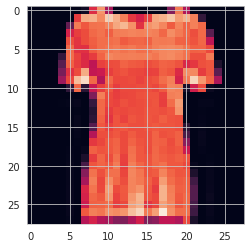

In [11]:
plt.imshow(X_train[10])

In [12]:
y_train[10]

0

In [13]:
y_train.shape

(60000,)

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [16]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

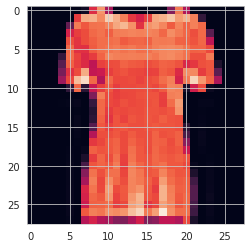

In [17]:
plt.imshow(X_train[10])

In [18]:
y_train[0]

9

In [19]:
classes[y_train[0]]

'Ankle boot'

In [20]:
classes[int(y_train[0])]

'Ankle boot'

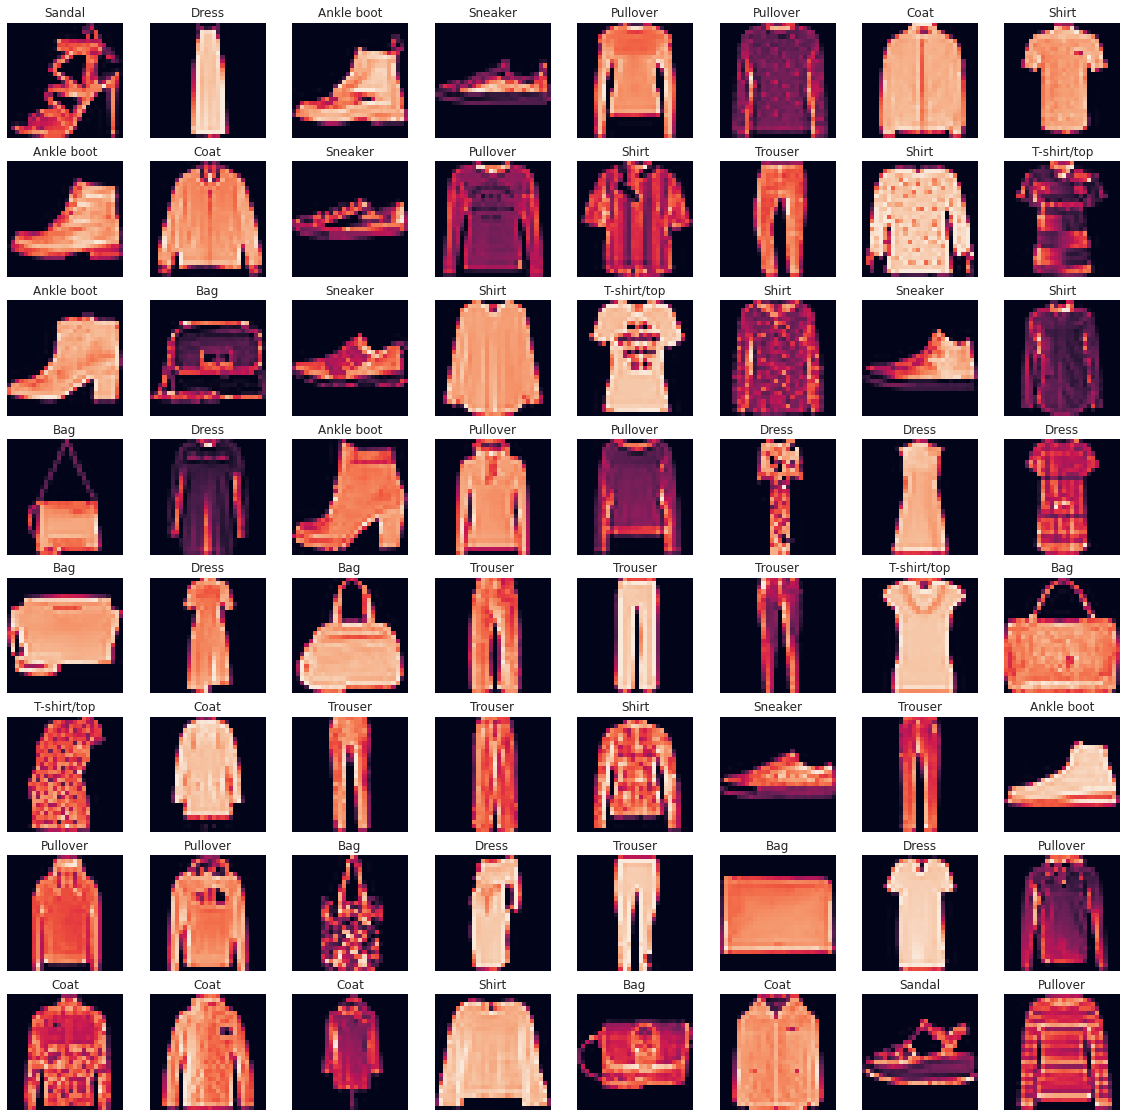

In [21]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [22]:
X_train[10].min()

0

In [23]:
X_train[10].max()

255

In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
X_train[10].min()

0.0

In [26]:
X_train[10].max()

1.0

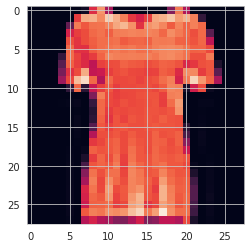

In [27]:
plt.imshow(X_train[10])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [28]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [29]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [30]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
y_train.shape

(60000,)

In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [35]:
y_train[9]

5

In [36]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [44]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 28)        7084      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 18928)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [48]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 201s 106ms/step - loss: 0.3580 - accuracy: 0.8708 - val_loss: 0.2704 - val_accuracy: 0.9019
Epoch 2/10
1875/1875 [==============================] - 197s 105ms/step - loss: 0.2396 - accuracy: 0.9155 - val_loss: 0.2604 - val_accuracy: 0.9080
Epoch 3/10
1875/1875 [==============================] - 195s 104ms/step - loss: 0.2100 - accuracy: 0.9268 - val_loss: 0.2827 - val_accuracy: 0.8994
Epoch 4/10
1875/1875 [==============================] - 193s 103ms/step - loss: 0.1932 - accuracy: 0.9330 - val_loss: 0.2633 - val_accuracy: 0.9101


**TASK 7: Plot values of metrics you used in your model.**

In [49]:
model.metrics_names

['loss', 'accuracy']

In [50]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.358,0.871,0.270,0.902
1,0.240,0.916,0.260,0.908
2,0.210,0.927,0.283,0.899
3,0.193,0.933,0.263,0.910


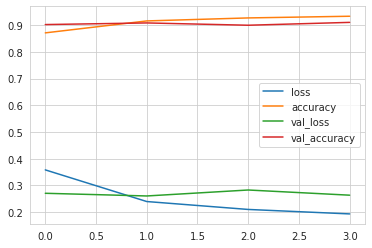

In [51]:
summary.plot();

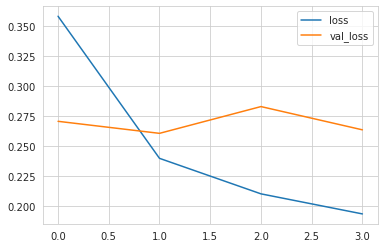

In [52]:
summary[["loss", "val_loss"]].plot();

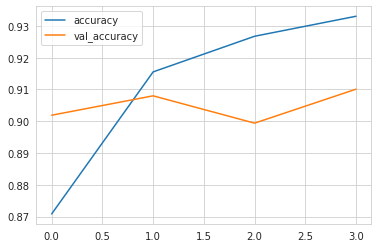

In [53]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.2604 - accuracy: 0.9080


[0.2604045271873474, 0.9079999923706055]

In [56]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2604045271873474
Test accuracy: 0.9079999923706055


In [57]:
pred_prob = model.predict(X_test)
pred_prob

array([[5.2015716e-09, 2.4983799e-09, 6.3296088e-09, ..., 2.3971588e-04,
        2.0826437e-08, 9.9970967e-01],
       [1.8390809e-04, 2.9367719e-10, 9.9904281e-01, ..., 2.4446336e-09,
        2.7382526e-08, 1.6192917e-11],
       [1.1765984e-07, 9.9999917e-01, 5.9101812e-09, ..., 9.6053421e-10,
        7.4252583e-08, 3.7020875e-10],
       ...,
       [5.3757509e-11, 2.5431389e-15, 1.7437201e-11, ..., 4.0006377e-11,
        1.0000000e+00, 2.4061194e-12],
       [3.1653717e-09, 1.0000000e+00, 6.6639187e-11, ..., 5.7663241e-12,
        9.9931285e-10, 1.6759472e-11],
       [1.3079658e-03, 1.4478364e-05, 6.5763481e-04, ..., 1.8330003e-01,
        6.2115248e-03, 1.8757803e-02]], dtype=float32)

In [58]:
pred_prob.shape

(10000, 10)

In [59]:
pred_prob[0]

array([5.2015716e-09, 2.4983799e-09, 6.3296088e-09, 6.7703225e-09,
       3.7519239e-08, 5.0107734e-05, 3.7693340e-07, 2.3971588e-04,
       2.0826437e-08, 9.9970967e-01], dtype=float32)

In [60]:
np.argmax(pred_prob[0])

9

In [61]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [62]:
y_pred.shape

(10000,)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.88      0.85      0.86      1000
           3       0.88      0.94      0.91      1000
           4       0.85      0.87      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.72      0.74      0.73      1000
           7       0.94      0.99      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [64]:
print(confusion_matrix(y_test, y_pred))

[[820   0  11  29   4   2 127   0   7   0]
 [  2 973   1  16   4   0   2   0   2   0]
 [ 21   1 848   9  71   0  49   0   1   0]
 [  5   0   6 936  15   0  36   0   2   0]
 [  1   0  27  35 873   0  62   0   2   0]
 [  0   0   0   0   0 976   0  15   0   9]
 [ 81   1  68  34  65   0 740   0  11   0]
 [  0   0   0   0   0   5   0 986   0   9]
 [  2   0   1   4   1   2   3   4 983   0]
 [  0   0   0   0   0   5   2  48   0 945]]


## Prediction

In [65]:
my_example = X_test[20]

In [66]:
my_example.shape

(28, 28, 1)

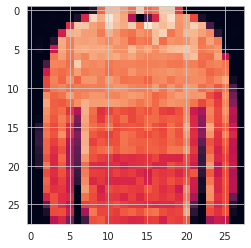

In [67]:
plt.imshow(my_example.reshape(28,28));

In [69]:
pred_prob = model.predict(my_example.reshape(1,28,28,1))
pred_prob

array([[2.6692572e-04, 8.6338233e-08, 9.9784350e-01, 7.6008514e-06,
        3.0244686e-04, 2.0969418e-07, 1.5705506e-03, 1.8214317e-08,
        8.5528800e-06, 4.1599449e-10]], dtype=float32)

In [70]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

2

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___